# #Import necessary libraries

In [1]:
import pandas as pd # Pandas for data manipulation using dataframes
import numpy as np  # Numpy for data statistical analysis 
import matplotlib.pyplot as plt # matplotlib for data visualisation
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import random

In [2]:
np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

In [3]:
sns.set(style='white', context='notebook', palette='deep')

# 1.data Preparation

1.1 Load Data

In [4]:
train=pd.read_csv("C:/Users/HP/Desktop/python codes/intership AL 2021/dataset/train.csv")

In [5]:
test=pd.read_csv("C:/Users/HP/Desktop/python codes/intership AL 2021/dataset/test.csv")

In [6]:
Y_train=train["label"]
X_train=train.drop(labels=["label"],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

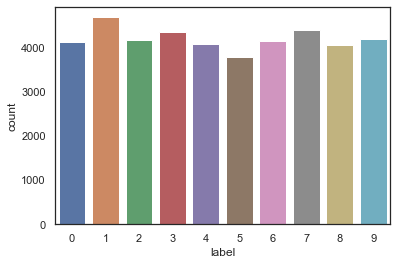

In [7]:
sns.countplot(Y_train)

 1.2check for null and missing values

In [8]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

1.3 Normalization

In [10]:
X_train = X_train/255.
test = test/255.

1.4 Reshape

In [11]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

1.5 Label Encoding

In [12]:
Y_train = to_categorical(Y_train, num_classes = 10)

1.6 Split training and validation set

In [13]:
X_train,X_val,Y_train,Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 2)

In [14]:
print(f"Training shape {X_train.shape}\nValidation shape {X_val.shape}")

Training shape (37800, 28, 28, 1)
Validation shape (4200, 28, 28, 1)


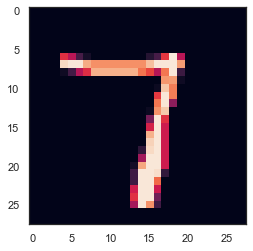

In [15]:
g = plt.imshow(X_train[1][:,:,0])

In [16]:
training = np.array(train, dtype = 'float32')
testing = np.array(test, dtype='float32')

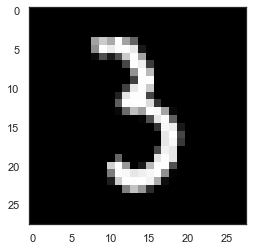

In [17]:
# Let's view some images!
i = random.randint(1,37800) # select any random index from 1 to 60,000
plt.imshow(training[i,1:].reshape((28,28)) ) # reshape and plot the image

plt.imshow(training[i,1:].reshape((28,28)) , cmap = 'gray') # reshape and plot the image

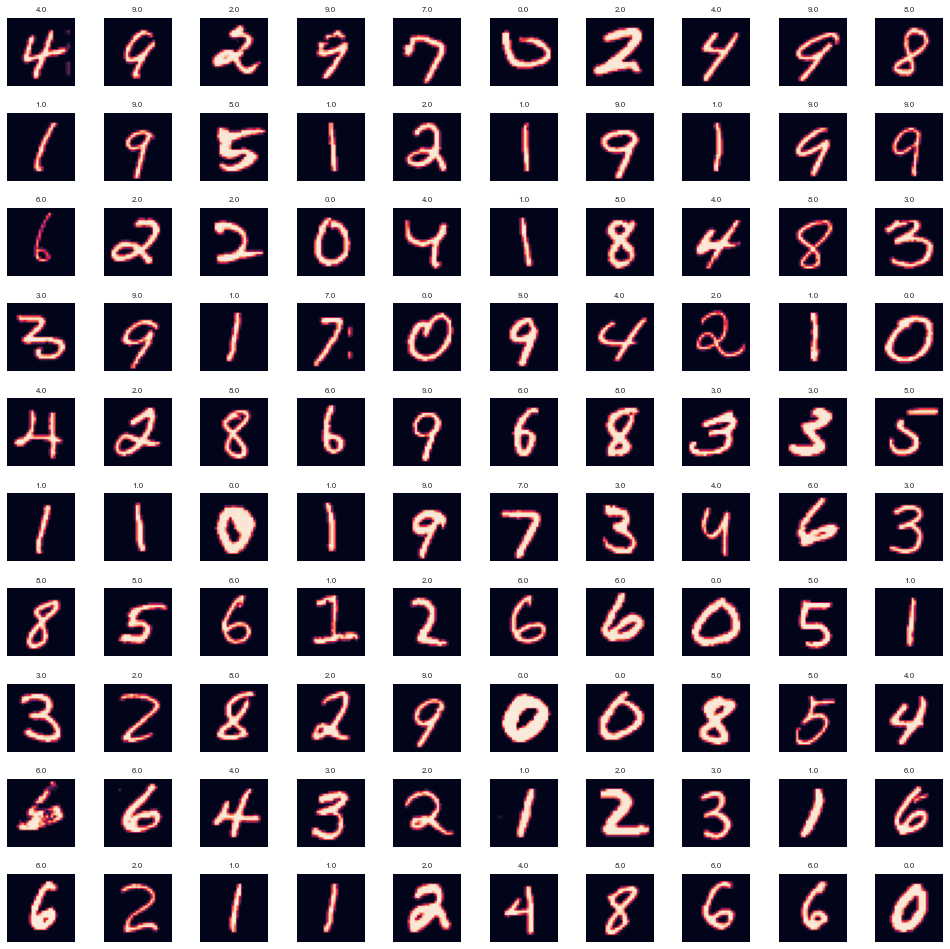

In [18]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(W_grid,L_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)# 0 is for label column
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# 2. CNN

2.1 Define the model

In [19]:
#import tensorflow as tf
"""from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense"""

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))          
model.add(Dense(10, activation='softmax'))


In [24]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image('model.png')

ImportError: cannot import name 'plot_model' from 'keras.utils' (C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\__init__.py)

2.2 Set the optimizer

In [25]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


2.3 Compile model

In [26]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

2.4 Audjusting learing rate

In [27]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                           patience=3,
                                           verbose=1,
                                           factor=0.5,
                                           min_lr=0.00001)

2.5 Data Augmentation

In [28]:
datagen = ImageDataGenerator(
featurewise_center=False,
samplewise_center=False,
featurewise_std_normalization=False,
samplewise_std_normalization=False,
zca_whitening=False,
rotation_range=10,
zoom_range=0.1,
width_shift_range=0.1,
horizontal_flip=False,
vertical_flip=False)

datagen.fit(X_train)

In [29]:
epochs = 30
batch_size = 128

# 3 model trainig

In [30]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
                              
                             epochs=epochs,
                             validation_data=(X_val,Y_val),
                             verbose=2,
                             steps_per_epoch=X_train.shape[0]//batch_size,
                             callbacks=[learning_rate_reduction])

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
295/295 - 113s - loss: 0.2680 - accuracy: 0.9174 - val_loss: 0.6352 - val_accuracy: 0.7812
Epoch 2/30
295/295 - 102s - loss: 0.0837 - accuracy: 0.9748 - val_loss: 0.0493 - val_accuracy: 0.9862
Epoch 3/30
295/295 - 106s - loss: 0.0627 - accuracy: 0.9808 - val_loss: 0.0999 - val_accuracy: 0.9740
Epoch 4/30
295/295 - 104s - loss: 0.0512 - accuracy: 0.9848 - val_loss: 0.0384 - val_accuracy: 0.9907
Epoch 5/30
295/295 - 108s - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.0968 - val_accuracy: 0.9774
Epoch 6/30
295/295 - 108s - loss: 0.0420 - accuracy: 0.9874 - val_loss: 0.0238 - val_accuracy: 0.9929
Epoch 7/30
295/295 - 109s - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0383 - val_accuracy: 0.9917
Epoch 8/30
295/295 - 110s - loss: 0.0352 - accuracy: 0.9894 - val_loss: 0.0372 - val_accuracy: 0.9886
Epoch 9/30
295/295 - 112s - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0300 - val_accuracy: 0.9917
Epoch 10/30
295/295 - 114s - loss: 0.0286 - accuracy: 0.9915 - val_loss: 0.0269 - 

# 4.Evaluate the Model

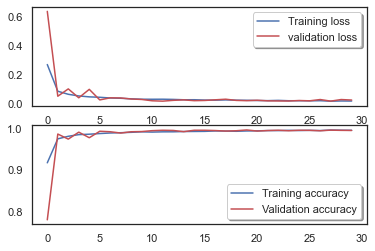

In [31]:

# Plot the loss and accuracy curves for training and validation 

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)


In [32]:
Results = model.predict(test)

In [33]:
Results = np.argmax(Results,axis = 1)

In [34]:
Results = pd.Series(Results,name="Label")

In [35]:
print(Results)

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64


In [36]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),Results],axis = 1)

In [37]:
print(submission)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      0
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


                                                       THANK YOU